In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import keras

from tensorflow.keras import layers
from tensorflow.keras import losses

import matplotlib.pyplot as plt

from pymystem3 import Mystem
mystem = Mystem()

2024-05-30 13:53:04.392187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def lemmatize(input_data):
  a = mystem.lemmatize(input_data)
  return "".join(a)

In [14]:
SPECIFIC_LABELS = {
    0:'Neutral', 
    2:'Bad', 
    1:'Good',
}

LABELS = {
    'Bad':0, 
    'Neutral':1, 
    'Good':2,
}


def adjust_labels(specific_label):
    return LABELS[SPECIFIC_LABELS[specific_label]]

In [6]:
train_data = pd.read_csv("/home/alex/Data/datasets/RuSentiment/train.csv")
validation_data = pd.read_csv("/home/alex/Data/datasets/RuSentiment/valid.csv")


In [7]:
train_data

,Unnamed: 0,text,sentiment
0,21098,".с.,и спросил его: о Посланник Аллаха!Ты пори...",1
1,21099,Роднее всех родных Попала я в ГКБ №8 еще в дек...,1
2,21100,Непорядочное отношение к своим работникам Рабо...,2
3,21101,"). Отсутствуют нормативы, Госты и прочее, что ...",1
4,21102,У меня машина в руках 5 лет и это п...,1
...,...,...,...
189886,210984,"Мой юбилей я отмечал в ресторане "" Астория "" ....",2
189887,210985,"Отлично встретили, разместили в роскошном номе...",1
189888,210986,Была в Васаби на ст. метро Сенная . Во первых...,0
189889,210987,Ребята не стоит смотреть этот фильм. Вы молоды...,0


In [12]:
train_raw_text_data = np.array(train_data['text'].map(lemmatize))
validation_raw_text_data = np.array(validation_data['text'].map(lemmatize))

In [16]:
train_label_data = keras.utils.to_categorical(np.array(train_data['sentiment'].map(adjust_labels)))
validation_label_data = keras.utils.to_categorical(np.array(validation_data['sentiment'].map(adjust_labels)))

In [18]:
train_raw_text_data

array(['.с.,и спрашивать он:  о посланник аллах!ты порицать что-то из слушание?  он отвечать: я не порицать ничто из он,но передавать они,чтобы они открывать свой собрание коран и закрывать их коран ...........это доходить до мы мнение и тот кто находиться в поиск истина,по мера изучение этот вопрос быть сталкиваться с разногласие и быть оставаться в растерянность или склоняться к мнение один из сторона по свой желание.но весь это недостаточно,потому что он сам должный находить истина,подробно изучать вопрос запретный и разрешать.|||||||||||||||||||||||||||||||||||||обращать внимание:основатель весь четыре мазхабов осуждать песня и поэззия.и это часто грешить заблудший суфий.исключение делаться для исламский тематика  сахих бухарио проявление радость во время праздник.498 (949). сообщаться, что ‘аиша, да быть довольный она аллах, сказать: (однажды) посланник аллах, да благословлять он аллах и приветствовать, входить ко я в тот время, когда у я находиться два девушка, петь песня о Бу‘ас

In [19]:
max_features = 20000
sequence_length = 1000

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
#    standardize=custom_standardization,
    output_mode='int',
#    ngrams=2,
    output_sequence_length=sequence_length
)

In [20]:
vectorize_layer.adapt(train_raw_text_data)

2024-05-30 14:26:38.950459: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 350053920 exceeds 10% of free system memory.
2024-05-30 14:26:38.950544: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 525080880 exceeds 10% of free system memory.
2024-05-30 14:26:39.724091: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 175026960 exceeds 10% of free system memory.
2024-05-30 14:26:40.090834: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 175026960 exceeds 10% of free system memory.


In [21]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'и',
 'в',
 'не',
 'на',
 'быть',
 'с',
 'что',
 'я',
 'по',
 'это',
 'а',
 'очень',
 'но',
 'мы',
 'все',
 'за',
 'этот',
 'к',
 'как',
 'то',
 'весь',
 'отель',
 'у',
 'для',
 'он',
 'год',
 'так',
 'от',
 'они',
 'номер',
 'который',
 'врач',
 'из',
 'вы',
 'она',
 'такой',
 'хороший',
 'до',
 'свой',
 'только',
 'если',
 'еще',
 'один',
 'же',
 'мой',
 'день',
 'мочь',
 'раз',
 'о',
 'человек',
 'спасибо',
 'сказать',
 'бы',
 'можно',
 'уже',
 'при',
 'много',
 'там',
 'просто',
 'нет',
 'большой',
 'время',
 'ребенок',
 'тот',
 'персонал',
 'наш',
 'или',
 'даже',
 'другой',
 'ресторан',
 'после',
 'место',
 'самый',
 'когда',
 'хотеть',
 'завтрак',
 'первый',
 'без',
 '–',
 'сам',
 'себя',
 'хорошо',
 'вот',
 'клиника',
 'ни',
 'работать',
 'цена',
 'центр',
 'кто',
 'понравиться',
 'работа',
 'минута',
 'сделать',
 '2',
 'становиться',
 'тоже',
 'чтобы',
 'два',
 'новый',
 'да',
 'говорить',
 'со',
 'отличный',
 'делать',
 'давать',
 'деньги',
 'отношение',
 'огр

In [22]:
train_text_data = vectorize_layer(train_raw_text_data)
validation_text_data = vectorize_layer(validation_raw_text_data)

2024-05-30 14:27:05.928745: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 350053920 exceeds 10% of free system memory.


In [23]:
train_text_data

<tf.Tensor: shape=(189891, 1000), dtype=int64, numpy=
array([[12736,   387,    26, ...,     0,     0,     0],
       [ 1743,    22,  3328, ...,     0,     0,     0],
       [16132,   108,    19, ...,     0,     0,     0],
       ...,
       [    6,     3,  9006, ...,     0,     0,     0],
       [ 1280,     4,   360, ...,     0,     0,     0],
       [  193,     1,   260, ...,     0,     0,     0]])>

In [48]:
embedding_dim=256


model = tf.keras.Sequential([
  #keras.Input(shape=(None,), dtype='int64'),
#  layers.Embedding(
#    max_features + 1, 
#    embedding_dim,
#    embeddings_initializer="uniform",
#  ),  
#  layers.Dropout(0.2),
#  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
#  layers.Dense(100, activation='relu'),
#  layers.Dense(50, activation='relu'),
  layers.Dense(3)
])



ValueError: Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None, 3) for variable path='sequential_6/dense_6/kernel'

In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_5 (Dropout)             │ (None, None, 20000)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, None, 3)        │        60,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,003 (234.39 KB)

 Trainable params: 60,003 (234.39 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss=losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
epochs = 30
history = model.fit(
    x = train_text_data,
    y = train_label_data,
    validation_data=(validation_text_data, validation_label_data),
    epochs=epochs)

Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 20000), dtype=int64). Expected shape (None, None, 20000), but input has incompatible shape (None, 20000)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 20000), dtype=int64)
  • training=True
  • mask=None

In [40]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

export_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ ?                      │     1,000,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,403 (3.82 MB)

 Trainable params: 1,000,403 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

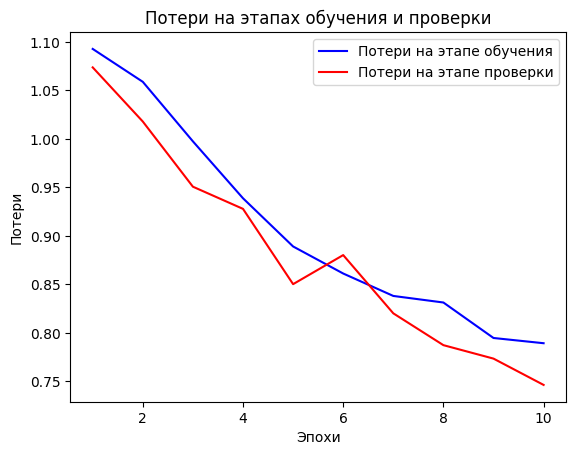

In [41]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "r", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

In [25]:
train_ds=tf.data.Dataset.from_tensor_slices((train_text_data, train_label_data)).shuffle(10000).batch(128)
validation_ds=tf.data.Dataset.from_tensor_slices((validation_text_data, validation_label_data)).shuffle(10000).batch(128)

In [28]:
ltsm_embedding_dim=32

model_lstm = tf.keras.Sequential([
    keras.Input(shape=(None,), dtype="int64"),
    tf.keras.layers.Embedding(
        input_dim=(max_features),
        output_dim=ltsm_embedding_dim,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_lstm.summary()

model_lstm.compile(loss=losses.CategoricalCrossentropy(from_logits=False),
              optimizer='rmsprop',
              metrics=['accuracy', 'F1Score'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 32)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690,051 (2.63 MB)

 Trainable params: 690,051 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
checkpoint_filepath = "models/checkpoint_rusentiment_model_lstm.keras"

epochs = 10
history = model_lstm.fit(
    x = train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
        )        
    ]
)

Epoch 1/10
  25/1484 ━━━━━━━━━━━━━━━━━━━━ 47:50 2s/step - F1Score: 0.2480 - accuracy: 0.4470 - loss: 1.0707

KeyboardInterrupt: 

In [40]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "r", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [43]:
export_model_lstm = tf.keras.Sequential([
  vectorize_layer,
  model_lstm
])

export_model_lstm.compile(
    loss=losses.CategoricalCrossentropy(from_logits=False), optimizer="rmsprop", metrics=['accuracy', 'F1Score']
)

export_model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │       698,115 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,115 (2.66 MB)

 Trainable params: 698,115 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model_lstm.evaluate(
    x = validation_text_data,
    y = validation_label_data,
)

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - F1Score: 0.6093 - accuracy: 0.6310 - categorical_accuracy: 0.6310 - loss: 1.2004 - precision: 0.6388 - recall: 0.6229


[1.2203831672668457,
 0.6159999966621399,
 0.6159999966621399,
 0.6203830242156982,
 0.6046666502952576,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.7178217, 0.3944723, 0.6693548], dtype=float32)>]

In [36]:
test_text_data

<tf.Tensor: shape=(1500, 600), dtype=int64, numpy=
array([[ 194,    7, 1466, ...,    0,    0,    0],
       [ 948,   56,   15, ...,    0,    0,    0],
       [   4,  220, 3727, ...,    0,    0,    0],
       ...,
       [1317, 3769,   37, ...,    0,    0,    0],
       [2821,  104,    4, ...,    0,    0,    0],
       [ 633,  655,  734, ...,    0,    0,    0]])>

In [44]:
s = custom_standardization('''
Являюсь студентом первого курса факультета Э
За эти три месяца, что я здесь проучилась - почувствовала лишь разочарование. Ожидания от «лучшего технического» были явно лучше. Почему же так произошло? Разберём более детально 
''')

export_model_lstm.predict(tf.data.Dataset.from_tensor_slices([[[s]]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


array([[9.6998078e-01, 2.9510092e-02, 5.0910184e-04]], dtype=float32)

In [116]:
np.sum(validation_label_data, 0)

array([0.12044521, 0.5130566 , 0.36649826], dtype=float32)

In [45]:
export_model_lstm.save('models/export_model_lstm.keras')

In [47]:
export_model_lstm_2=keras.models.load_model('models/export_model_lstm.keras')

/home/alex/ai_venv_2/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [48]:
export_model_lstm_2.predict(tf.data.Dataset.from_tensor_slices([[[s]]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


array([[9.6998078e-01, 2.9510092e-02, 5.0910184e-04]], dtype=float32)